## Yolo 적용을 위한 파이썬과 딥러닝 이해
# MNIST 신경망 적용

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### MNIST 불러오기

In [2]:
from keras.datasets import mnist

C:\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train.max()

255

Text(0.5,1,'5')

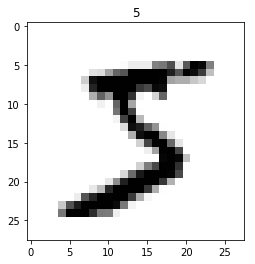

In [6]:
plt.imshow(X_train[0], cmap='gray_r')
plt.title(y_train[0])

### 데이터 전처리
- 값을 0~1 사이로 변환
- 28X28 이미지를 옆으로 펼친다.
- y 값은 원핫인코딩으로 바꾼다. (5 => [0,0,0,0,0,1,0,0,0,0])

In [7]:
X_train = X_train.reshape(-1, 28*28)/255.
X_test = X_test.reshape(-1, 28*28)/255.
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [9]:
X_train.max()

1.0

In [10]:
y_train[:3]

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

<img src='https://mmlind.github.io/images/1lnn_input.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)
- 그림에서 픽셀 갯수가 잘못 표기됨 (784가 맞음)

<img src='https://mmlind.github.io/images/1lnn_nnlayer.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 픽셀 수가 784 이므로 속성 갯수가 784인 경우이다.
- w1, w2, w3, ..., w784, b
- w1\*x1 + w2\*x2 + ... + w784\*x784 + b

### 타겟 클래스가 10개
- 이전 예제에서는 청소년/어른 으로 클래스가 2개였다.
- 하지만 MNIST 에서는 0~9 로 타겟 클래스가 총 10개 이다.

<img src='https://mmlind.github.io/images/1lnn.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 타겟 클래스가 10개이므로, 가중치와 절편이 그 만큼 늘어난다.
- 클래스값 0 => w1_1, w1_2, ..., w1_784, b1
- 클래스값 1 -> w2_1, w2_2, ..., w2_784, b2
- 총 가중치 = 784\*10, 총 절편 = 10

### 손실값 정의

<img src='https://mmlind.github.io/images/1lnn_full.svg' />
(출처: https://mmlind.github.io/Simple_1-Layer_Neural_Network_for_MNIST_Handwriting_Recognition/)

- 위와 같은 결과를 얻었을 때, 손실값을 어떻게 계산할까?
- mse = (0.003126 - 0)^2 + ... + (0.682134 - 1)^2 + ...
- 위와 같이 mse 를 적용할 수 있다.
- 하지만, 이런 멀티 클래스의 경우에는 다른 손실값을 적용하는 것이 일반적이다.
- 위 그림은 숫자 6을 판별한 것이다. 그러므로 결과값은 6 위치만 값이 1이다.
> cross_entropy = -log(0.682134), 입력 이미지 1개에 대한 손실값
- 입력 이미지가 많으므로 각각의 크로스엔트로피를 모두 더한 것이 최종값이다.
> $ cross\_entropy = \sum_i {-log(해당숫자의 예측값)} $

### Softmax 함수

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ6QRL4yW5p4j634dzSyjZWMWWCGXaU_MZVnqDq_HErnH5RCCIizQ' />
(출처 : https://www.google.com/search?tbm=isch&sa=1&ei=VFNCXfrICcybmAWZw6_ACQ&q=mnist+softmax&oq=mnist+softmax&gs_l=img.3..0i24l3.528.3330..3872...0.0..1.585.3193.0j1j5j2j1j1......0....1..gws-wiz-img.uKr_Bjki0oA&ved=0ahUKEwj6wvvf1ODjAhXMDaYKHZnhC5gQ4dUDCAY&uact=5#imgrc=Bwc55tfbS2SjXM:)

- 실제로는 위와 같이 마지막 출력값을 내기 전에 softmax 라는 함수를 적용하여 출력값을 바꾸어 준다.

<img src='https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg' />
(출처: https://www.youtube.com/watch?v=lvNdl7yg4Pg)

- 출력값이 [2,1,0.1] 일때, 각각에 exponential 지수를 적용한 값의 비율을 구한 것이 softmax 이다.
- softmax 를 적용하면 최종 출력값을 모두 더하면 1이 된다. (즉 확률 개념이 된다.)

### Keras 로 구현

<img src='mnist_nn.jpg' />
(출처: http://users.jyu.fi/~olkhriye/ties4911/lectures/Lecture03.pdf )<br>
<img src='https://image.slidesharecdn.com/tensorflowppt-160408142819/95/tensorflow-5-638.jpg?cb=1460125744' />
(출처: https://www.slideshare.net/jirimaterna/tensorflow-60661959 )

In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(10, activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [18]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 81us/step - loss: 1.4029 - acc: 0.6526 - val_loss: 0.9003 - val_acc: 0.8222
Epoch 2/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.7954 - acc: 0.8286 - val_loss: 0.6587 - val_acc: 0.8586
Epoch 3/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.6430 - acc: 0.8522 - val_loss: 0.5620 - val_acc: 0.8708
Epoch 4/50
48000/48000 [==============================] - 3s 70us/step - loss: 0.5698 - acc: 0.8628 - val_loss: 0.5088 - val_acc: 0.8791
Epoch 5/50
48000/48000 [==============================] - 3s 69us/step - loss: 0.5255 - acc: 0.8697 - val_loss: 0.4746 - val_acc: 0.8840
Epoch 6/50
48000/48000 [==============================] - 3s 70us/step - loss: 0.4951 - acc: 0.8747 - val_loss: 0.4503 - val_acc: 0.8875
Epoch 7/50
48000/48000 [==============================] - 3s 70us/step - loss: 0.4728 - acc: 0.8788 - val_loss: 0.4322 - val_acc

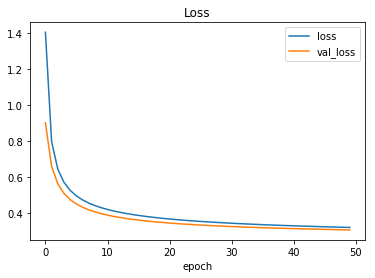

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

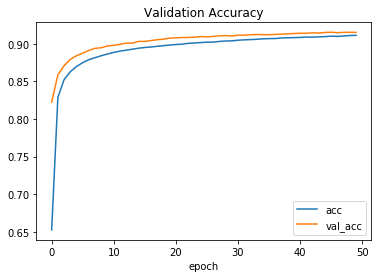

In [24]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Validation Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])

### 가중치 분석
- 하나의 타겟 클래스로 향하는 화살표를 보면 모두 784개이다.
- 화살표 마다 가중치가 하나씩 있으므로 클래스 마다 28X28 인 이미지로 표시할 수 있다.

In [25]:
ws = model.get_weights()

In [27]:
ws[0].shape

(784, 10)

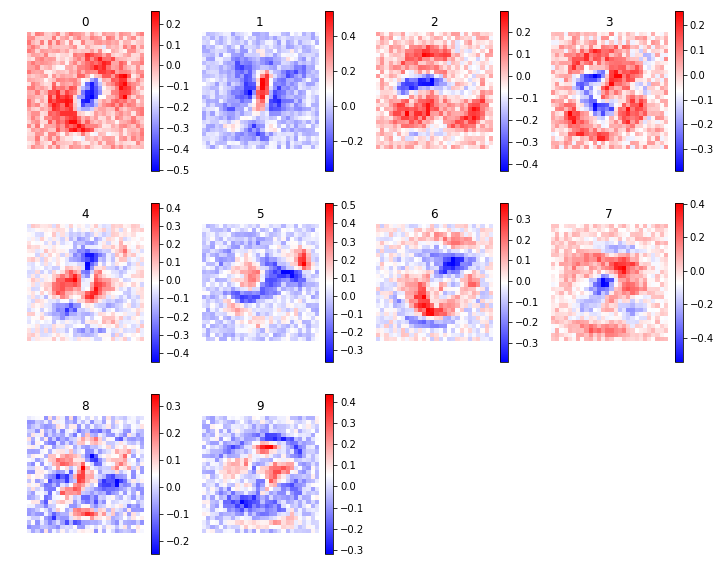

In [32]:
plt.figure(figsize=[12,10])

for i in range(10):
    plt.subplot(3,4,i+1)
    plt.imshow(ws[0][:,i].reshape(28,28), cmap='bwr')
    plt.axis('off')
    plt.title(i)
    plt.colorbar()

### 중간층 추가 (Hidden Layer)
- 아래 그림과 같이 입력과 출력 중간에 단계를 하나 더 넣는다. (여러개를 넣을 수도 있다.)
- 중간층의 출력값은 그냥 사용하지 않고 ReLU 함수를 적용한다.

<img src='https://ml4a.github.io/images/figures/mnist_2layers.png' />
(출처: https://ml4a.github.io/ml4a/looking_inside_neural_nets/ )

<img src='https://miro.medium.com/max/700/1*v88ySSMr7JLaIBjwr4chTw.jpeg' />
(출처: https://ml4a.github.io/ml4a/looking_inside_neural_nets/ )

- ReLU 함수

In [33]:
def relu(t):
    r = t
    if r<0: r=0
    return r

Text(0.5,1,'ReLU function')

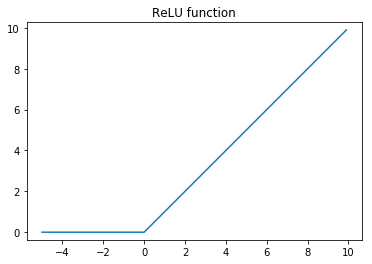

In [36]:
rng = np.arange(-5,10,0.1)
hgt = rng.copy()
hgt[hgt<0] = 0

plt.plot(rng, hgt)
plt.axis('equal')
plt.title('ReLU function')

In [41]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,))) # 128 노드, ReLU 적용
model.add(Dense(10, activation='softmax'))

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [43]:
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 8s 170us/step - loss: 1.3262 - acc: 0.6841 - val_loss: 0.7256 - val_acc: 0.8554
Epoch 2/50
48000/48000 [==============================] - 5s 114us/step - loss: 0.6193 - acc: 0.8563 - val_loss: 0.4897 - val_acc: 0.8830
Epoch 3/50
48000/48000 [==============================] - 5s 114us/step - loss: 0.4805 - acc: 0.8782 - val_loss: 0.4125 - val_acc: 0.8949
Epoch 4/50
48000/48000 [==============================] - 5s 112us/step - loss: 0.4212 - acc: 0.8889 - val_loss: 0.3732 - val_acc: 0.9006
Epoch 5/50
48000/48000 [==============================] - 5s 112us/step - loss: 0.3866 - acc: 0.8952 - val_loss: 0.3486 - val_acc: 0.9068
Epoch 6/50
48000/48000 [==============================] - 5s 113us/step - loss: 0.3629 - acc: 0.8997 - val_loss: 0.3308 - val_acc: 0.9091
Epoch 7/50
48000/48000 [==============================] - 5s 111us/step - loss: 0.3452 - acc: 0.9044 - val_loss: 0.3174 - 

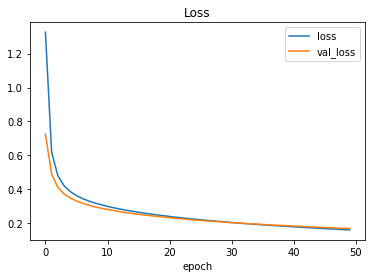

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

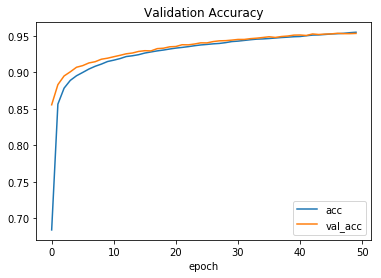

In [45]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Validation Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])